In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
%matplotlib inline
plt.style.use('dark_background')

In [3]:
# path_to_folder = '/content/drive/MyDrive/SMAI Project/'
path_to_folder = './'

## Get Face Matrix

In [4]:
neutral_faces = []
for i in range(1,201):
    im = cv2.imread(path_to_folder+"dataset/"+str(i)+"a.jpg",0)
    im = cv2.resize(im, (58,49), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    neutral_faces.append(im.flatten())

In [5]:
face_matrix = np.vstack(neutral_faces)
face_matrix, face_matrix.shape

(array([[254, 254, 254, ...,  57,  59,  70],
        [ 42,  34,  35, ...,  73,  48,   0],
        [ 95,  60,  43, ...,  61,  61,  58],
        ...,
        [210, 198, 146, ...,   5,   5,   4],
        [182, 204, 207, ...,  19,   0,   7],
        [213, 217, 202, ..., 110, 135, 151]], dtype=uint8),
 (200, 2842))

## Get Mean of Faces

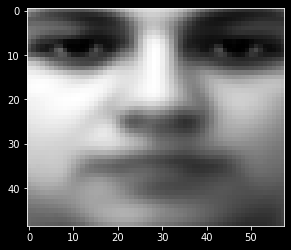

In [6]:
mean_face_array = np.mean(face_matrix,axis=0)
mean_face = mean_face_array.reshape(49,58)
plt.imshow(mean_face,cmap='gray',vmin=np.amin(mean_face),vmax=np.amax(mean_face))

## Get Eigen Values and Vectors of Covariance Matrix

In [7]:
# def eigen(mat):
#     new_mat = mat - np.mean(mat,axis=0)
#     cov = (new_mat.T @ new_mat) / (mat.shape[0]-1)

In [8]:
dim = mean_face_array.shape[0]
eigen_vecs, eigen_vals, V = np.linalg.svd(np.cov((face_matrix-mean_face_array).T))
eigen_vecs = eigen_vecs.T[np.argsort(eigen_vals)[-dim:][::-1]].T
eigen_vals = np.sort(eigen_vals)[-dim:][::-1]

In [9]:
# eigen_vecs = eigen_vecs.T[np.argsort(eigen_vals)].T

In [10]:
# eigen_vecs @ np.diag(eigen_vals) @ V, np.cov((face_matrix-mean_face_array).T)

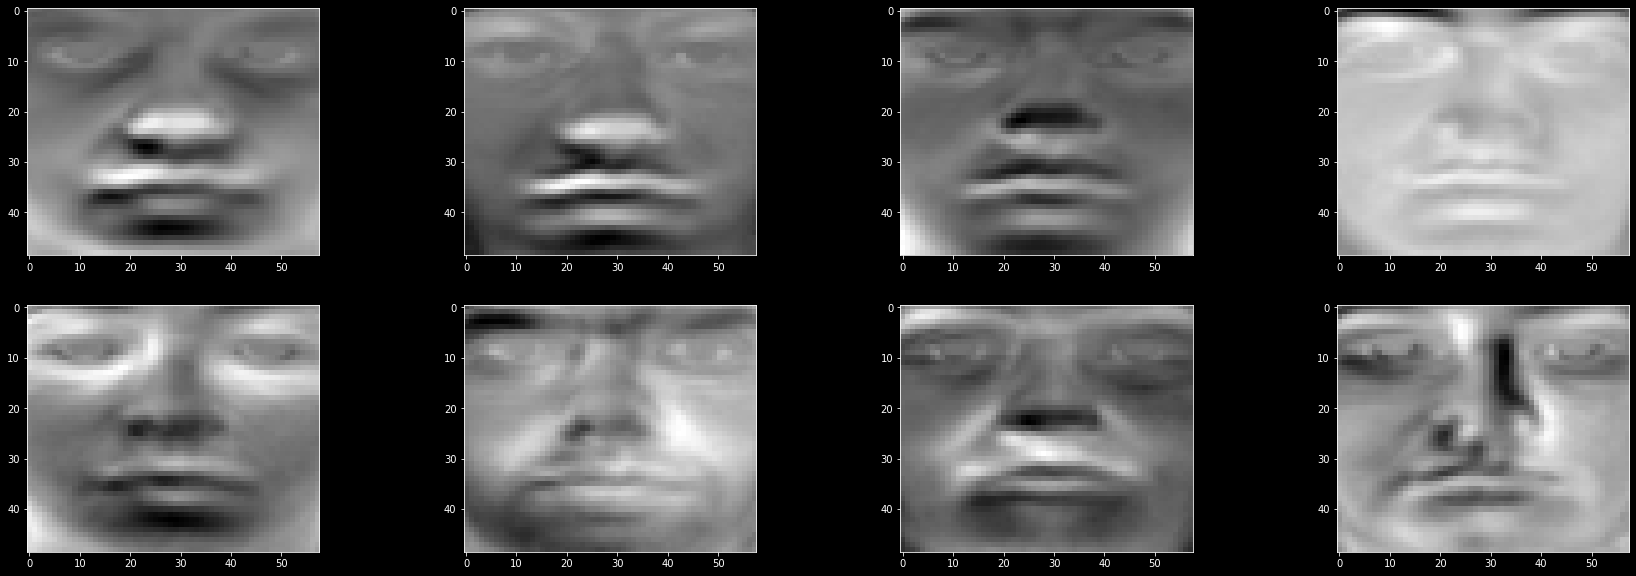

In [11]:
f,ax = plt.subplots(nrows=2,ncols=4,figsize=(30,10))
for i in range(8):
    ax[i//4,i%4].imshow(eigen_vecs[:,i].reshape(49,58),cmap='gray',vmin=np.amin(eigen_vecs[:,i]),vmax=np.amax(eigen_vecs[:,i]))
plt.show()

In [12]:
# projected_data = (face_matrix.T @ eigen_vecs).T
# projected_data, projected_data.shape

In [13]:
# f,ax = plt.subplots(nrows=2,ncols=4,figsize=(30,10))
# for i in range(7):
#     ax[i//4,i%4].imshow(projected_data[i].reshape(49,58),cmap='gray')
# ax[1,3].axis('off')
# plt.show()

In [14]:
w = (face_matrix-mean_face_array) @ eigen_vecs
w, w.shape, face_matrix-mean_face_array

(array([[ 3.12631567e+02, -1.18453954e+03,  1.53091568e+02, ...,
          1.02140518e-13, -5.48894263e-13,  1.96287431e-13],
        [ 4.81980370e+02,  9.81899757e+02, -8.09783162e+01, ...,
         -4.40536496e-13,  1.13686838e-13,  2.85993451e-13],
        [ 3.98423046e+02, -9.32621661e+02, -3.66974133e+02, ...,
          5.15143483e-14,  7.99360578e-14,  5.18696197e-13],
        ...,
        [-1.36033830e+03,  4.93251744e+01, -3.88886952e+01, ...,
          5.19584376e-13,  1.52766688e-13,  1.82964754e-13],
        [-3.26362850e+01, -2.23932917e+02, -5.18712014e+02, ...,
         -7.26085858e-14, -2.93098879e-14,  2.99316127e-13],
        [ 1.43672851e+03,  4.46379972e+02,  5.72494266e+01, ...,
         -3.64153152e-13, -9.85878046e-13, -4.50972593e-13]]),
 (200, 2842),
 array([[ 105.49 ,  112.645,  124.415, ...,    4.845,    1.635,    6.85 ],
        [-106.51 , -107.355,  -94.585, ...,   20.845,   -9.365,  -63.15 ],
        [ -53.51 ,  -81.355,  -86.585, ...,    8.845,    3.635,  

In [15]:
results = []
for i in range(1,201):
    test_im = cv2.imread(path_to_folder+"dataset/"+str(i)+"b.jpg",0)
    test_im_resize = cv2.resize(test_im, (58,49), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    w_test = test_im_resize.flatten() @ eigen_vecs
    results.append(np.argmin(np.sum((w-w_test)**2,axis=1))+1)
results = np.array(results)
print(f"Accuracy is {np.sum(results==np.arange(1,201))*100/results.shape[0]}%")
results
# print(str(index)+"a.jpg")
# result_im = cv2.imread(path_to_folder+"dataset/"+str(index)+"a.jpg",0)
# f,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,30))
# ax[0].imshow(test_im,cmap='gray')
# ax[0].set_title("Test image")
# ax[1].imshow(result_im,cmap='gray')
# ax[1].set_title("Result image")
# plt.show()

Accuracy is 39.5%


array([  1,  71, 181, 137, 137, 103, 173,   8,   9,  47,  11,  12,  13,
        14, 173,  16, 173,  18,  19,  20, 173,  58,  23,  24,  25,  26,
        27,  28, 103,  30, 136, 137, 128,  34,  35,  36, 173, 173, 173,
        40,  80,  42, 173,  44,  45,  46, 132,  48,  40,  66, 173, 118,
       110, 169, 118,  56, 173,  58, 137, 173,  61,  62,  63, 147, 173,
       173, 173, 128, 173,  70,  71, 173,  73,  74,  75,  76, 137, 173,
       173,  80, 137,  82,  43,  84,  85, 173, 132,  66, 137,  42, 124,
       110, 137, 136, 136, 173, 128,  28, 173, 173,  43, 173, 103, 173,
       103, 173, 107, 108, 192, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 180,  40, 137, 122, 123, 124,  85, 132, 110, 132, 132, 181,
        42, 132, 133, 173, 173, 136, 137, 173, 169,  86, 197, 142, 169,
       169, 145,  43, 147,  32, 173, 173, 131, 152, 153, 118,  28, 137,
       103, 103, 123, 160, 161, 103, 163, 164, 127, 103, 173, 161, 132,
       173, 171, 172, 173, 132, 173, 124, 173, 173,  12,  12, 17